                 model  train_time_sec  test_auc
0  Centralized XGBoost        0.337003  0.769405
1     2-Party VFL (HE)     5902.592441  0.707560
2     4-Party VFL (HE)     5858.814543  0.707202

Plot saved as 'performance_overhead.pdf' (for 2-column span)


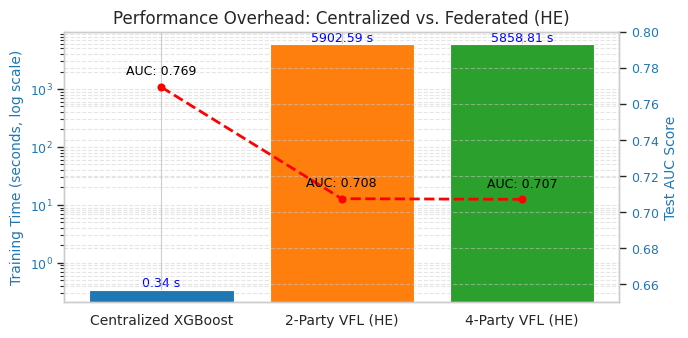

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# 📊 Performance Overhead Analysis
# ==============================
# Data from your provided results
results = {
    'model': ['Centralized XGBoost', '2-Party VFL (HE)', '4-Party VFL (HE)'],
    'train_time_sec': [0.337003, 5902.592441, 5858.814543],
    'test_auc': [0.769405, 0.707560, 0.707202]
}
df_results = pd.DataFrame(results)

print(df_results)

# --- Plotting (IEEE 2-Column Span) ---
# Use a 2-column width (~7 inches) for this complex plot
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.1)
fig, ax = plt.subplots(figsize=(7, 3.5))

# Plot bars for training time on a log scale
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = ax.bar(df_results['model'], df_results['train_time_sec'], color=colors)
ax.set_yscale('log')
ax.set_ylabel('Training Time (seconds, log scale)', fontsize=10, color='#1f77b4')
ax.set_title('Performance Overhead: Centralized vs. Federated (HE)', fontsize=12)
ax.tick_params(axis='y', labelcolor='#1f77b4', labelsize=9)
ax.tick_params(axis='x', labelsize=10, rotation=0) # No rotation needed

# Add data labels for time
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f} s',
            va='bottom', ha='center', color='blue', fontsize=9, fontweight='medium')

# Create a second y-axis for AUC
ax2 = ax.twinx()
ax2.plot(df_results['model'], df_results['test_auc'], color='red', marker='o', linestyle='--', linewidth=2)
ax2.set_ylabel('Test AUC Score', fontsize=10, color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4', labelsize=9)
ax2.set_ylim(0.65, 0.8)

# Add data labels for AUC
for i, txt in enumerate(df_results['test_auc']):
    # Center-align all AUC labels for a cleaner look
    ax2.text(i, txt + 0.005, f'AUC: {txt:.3f}',  # Small vertical offset
             va='bottom', ha='center', color='black', fontweight='medium', fontsize=9)

fig.tight_layout()
# Enable grid on both axes
ax.grid(True, which="both", ls="--", alpha=0.5, axis='y')
ax2.grid(True, which="major", ls="--", alpha=0.5, axis='y')

# Save the figure
plt.savefig('performance_overhead.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('performance_overhead.png', format='png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'performance_overhead.pdf' (for 2-column span)")
plt.show()